In [1]:
#pip install --user logomaker #uncomment if logomaker is not currently installed.
import logomaker

Matplotlib is building the font cache; this may take a moment.


Running /home/blacksmi/.local/lib/python3.9/site-packages/logomaker/examples/demo_fig1b.py:
-------------------------------------------------------------
# do imports
import matplotlib.pyplot as plt
import logomaker as logomaker

# load crp energy matrix
crp_df = -logomaker.get_example_matrix('crp_energy_matrix',
                                        print_description=False)

# create Logo object
crp_logo = logomaker.Logo(crp_df,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
crp_logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)

# style and show figure
crp_logo.fig.show()
--------

findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.
<string>:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


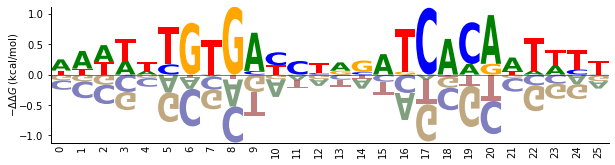

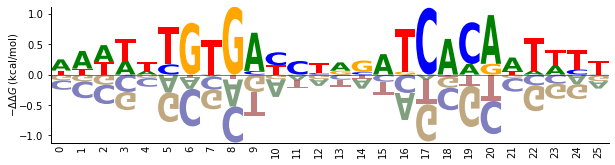

In [2]:
logomaker.demo('fig1b')


Description of example matrix "crp_energy_matrix":
# 
# CRP energy matrix from Kinney et al. (2010).
# Matrix values are in units of kcal/mol.
# 
# References
# 
# Kinney JB et al. (2010) Using deep sequencing to characterize the
# biophysical mechanism of a transcriptional regulatory sequence.
# Proc Natl Acad Sci USA. 107(20):9158–63.
# 



/tmp/ipykernel_2195066/2982766283.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  crp_logo.fig.show()


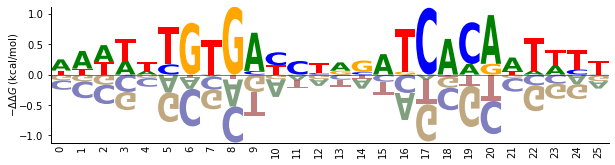

In [5]:
# do imports
import matplotlib.pyplot as plt
import logomaker as logomaker

# load crp energy matrix
crp_df = -logomaker.get_example_matrix('crp_energy_matrix',
                                        print_description=True)

# create Logo object
crp_logo = logomaker.Logo(crp_df,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
crp_logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)

# style and show figure
crp_logo.fig.show()

In [4]:
print(crp_df)

            A         C         G         T
pos                                        
0    0.183642 -0.155864 -0.094136  0.066358
1    0.290123 -0.277778 -0.111111  0.098765
2    0.276235 -0.316358 -0.168210  0.208333
3    0.226852 -0.285494 -0.297840  0.356481
4    0.060185 -0.143519 -0.057099  0.140432
5   -0.294753  0.168210 -0.486111  0.612654
6   -0.179012 -0.617284  0.851852 -0.055556
7   -0.033951 -0.212963 -0.324074  0.570988
8   -0.444444 -0.592593  1.117284 -0.080247
9    0.628086  0.060185 -0.285494 -0.402778
10  -0.291667  0.214506 -0.075617  0.152778
11  -0.091049  0.223765 -0.004630 -0.128086
12  -0.111111  0.024691 -0.074074  0.160494
13   0.137346 -0.084877  0.063272 -0.115741
14  -0.162037  0.041667  0.189815 -0.069444
15   0.336420 -0.114198 -0.003086 -0.219136
16  -0.444444 -0.302469  0.049383  0.697531
17  -0.080247  1.098765 -0.611111 -0.407407
18   0.586420 -0.370370 -0.179012 -0.037037
19   0.174383  0.686728 -0.677469 -0.183642
20   0.800926 -0.544753  0.17746

Text(0, 0.5, 'probability')

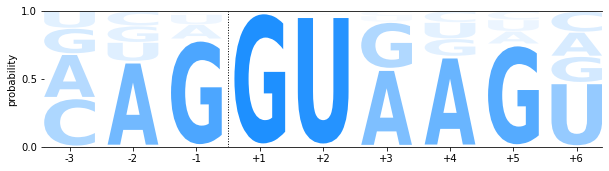

In [26]:
# load ss probability matrix
ss_df = logomaker.get_example_matrix('ss_probability_matrix',
print_description=False)
# create Logo object
ss_logo = logomaker.Logo(ss_df,
width=.8,
vpad=.05,
fade_probabilities=True,
stack_order='small_on_top',
color_scheme='dodgerblue')
# style using Logo methods
ss_logo.style_spines(spines=['left', 'right'], visible=False)
# style using Axes methods
ss_logo.ax.set_xticks(range(len(ss_df)))
ss_logo.ax.set_xticklabels('%+d'%x for x in [-3, -2, -1, 1, 2, 3, 4, 5, 6])
ss_logo.ax.set_yticks([0, .5, 1])
ss_logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
ss_logo.ax.set_ylabel('probability')


In [27]:
ss_df

,A,C,G,U
pos,,,,
0,0.324656,0.358980,0.189313,0.127051
1,0.628560,0.110845,0.120658,0.139936
2,0.105337,0.027597,0.794143,0.072923
3,0.000000,0.000000,1.000000,0.000000
4,0.000000,0.028156,0.000000,0.971844
5,0.572633,0.038576,0.347800,0.040991
6,0.666476,0.085075,0.128766,0.119683
7,0.092191,0.065904,0.757889,0.084016
8,0.177637,0.156259,0.193662,0.472442


          1         2         3         4         5         6         7
A  0.315834  0.314981  0.280410  0.252668  0.294067  0.383269  0.402475
T  0.368758  0.409731  0.416133  0.422962  0.391805  0.235595  0.310713
C  0.168160  0.153649  0.163892  0.174563  0.135723  0.178831  0.146394
G  0.147247  0.121639  0.139565  0.149808  0.178404  0.202305  0.140418


Text(0, 0.5, 'probability')

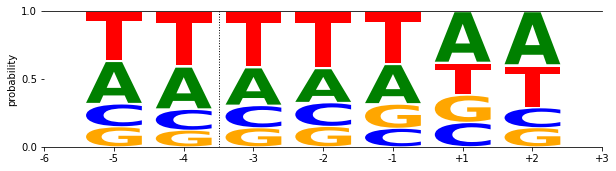

In [61]:
#Actual code here:
import sys
import pandas as pd

#First, extract the locus information:

import_file = "/home/blacksmi/links/kidd-lab/matt-projects/Stuff_For_Anthony/Identify_Hallmarks_From_Retrogenes/Scale_Up_2023_12_14/zoey/Retrogene_Output_dist_70.txt"
endo_cut_site = []
with open(import_file, 'rt') as infile:
    for line in infile:
        line = line.rstrip().split()
        if line[-1] != "N/A":
            #print(line[-1])
            endo_cut_site.append(line[-1])
endo_dict = {}
for i in range(len(endo_cut_site[0])):
    endo_dict[i+1] = {"A":0,"T":0,"C":0,"G":0}
#print(endo_dict)
for cut_site in endo_cut_site:
    for i in range(len(cut_site)):
        #print(cut_site[i])
        endo_dict[i+1][cut_site[i].upper()] +=1
        if endo_dict[i+1][cut_site[i]] == "N":
            sys.exit()
for key in endo_dict.keys():
    #print(endo_dict[key])
    for key2 in endo_dict[key].keys():
        #print(key2)
        endo_dict[key][key2] = endo_dict[key][key2]/len(endo_cut_site)
endo_dict
endo_pd = pd.DataFrame(endo_dict)
print(endo_pd)
endo_pd = endo_pd.T
# create Logo object
ss_logo = logomaker.Logo(endo_pd,
width=.8,
vpad=.05,
#fade_probabilities=True,
stack_order='big_on_top',
color_scheme='classic')
# style using Logo methods
ss_logo.style_spines(spines=['left', 'right'], visible=False)
# style using Axes methods
ss_logo.ax.set_xticks(range(len(ss_df)))
ss_logo.ax.set_xticklabels('%+d'%x for x in [-6, -5, -4, -3, -2, -1, +1, +2, +3])
ss_logo.ax.set_yticks([0, .5, 1])
ss_logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
ss_logo.ax.set_ylabel('probability')
